In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.pulse import frequency_offset

0.0008363520000000001


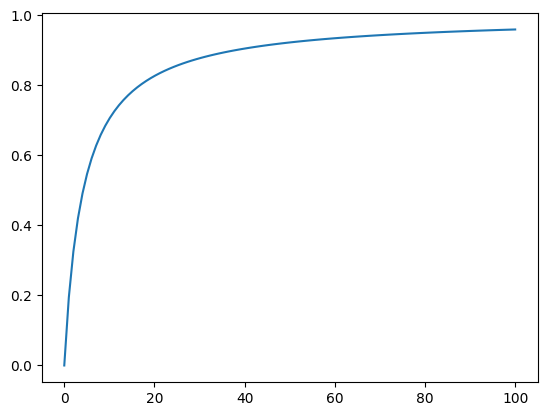

In [330]:
n_dot = np.linspace(0,100,100)
def photon_conversion_coupling(gamma, kappa, g, n_dot):
    delta_ab = np.sqrt(4*t**2+(0.8*wr)**2)-wr
    gamma_2 = gamma/2
    m = delta_ab**2+gamma_2**2
    G = compute_G(g, gamma)*100000
    chi_rho = 1/(delta_ab-1j*gamma_2)
    chi_ab = np.sqrt(kappa)/(-1j*kappa/2-g**2*chi_rho)
    absolute_chi_ab = abs(chi_ab)**2
    cavity_photon = absolute_chi_ab*n_dot
    print(G)
    delta_mz = 1*(G*cavity_photon)/(1+G*cavity_photon)
    current = 1*delta_mz
    return current
plt.plot(n_dot, photon_conversion_coupling(gamma,kappa,g,n_dot))
plt.show()

In [553]:
p_in = np.linspace(0.00,0.042, 100)
wr = 4
n_dot = p_in*10**-15/(10**18*wr*6.626*10**-34)
K = -0.0001
gamma = 0.5
kappa = 0.014
kc = 0.013
t = 1.1
g0 = 0.100
g = g0 * 2 * t / wr
gamma_r = 0.03 * 2 * np.pi



def compu_G(photon, cross_kerr):
    return 4*g**2/((gamma+cross_kerr*photon**2)**2+gamma)

def photon_conversion_coupling(gamma, kappa, g, n_dot, K):
    delta_rho_b = np.sqrt(4 * t ** 2 + (0.8 * wr) ** 2) - wr
    gamma_2 = gamma / 2
    chi_rho = 1 / (delta_rho_b - 1j * gamma_2)
    roots = []
    currents = []
    for i in range(len(n_dot)):
        effective_g = g
        y = np.polynomial.Polynomial([-kappa*n_dot[i],-(1j*(kappa)/2+effective_g**2*chi_rho)*(1j*kappa/2-effective_g**2*np.conj(chi_rho)), (2*effective_g**4*(1j*chi_rho).real)*K,(K)**2])
        root = np.max((y.roots().real))
        roots.append(root)
    return roots

/var/folders/0x/61cppml13m3_585zg8q3279w0000gn/T/ipykernel_13677/1204995331.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  currents.append(1 / (1 + 1 / (G*photon[i])) * gamma * 10 ** 9 *10 ** -19 * 1.602)
/var/folders/0x/61cppml13m3_585zg8q3279w0000gn/T/ipykernel_13677/1204995331.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  efficiency.append(1 / (1 + 1 / (G*photon[i])) * gamma * 10 ** 9/(n_dot[i]*10**9))
/var/folders/0x/61cppml13m3_585zg8q3279w0000gn/T/ipykernel_13677/1204995331.py:15: RuntimeWarning: invalid value encountered in scalar divide
  efficiency.append(1 / (1 + 1 / (G*photon[i])) * gamma * 10 ** 9/(n_dot[i]*10**9))


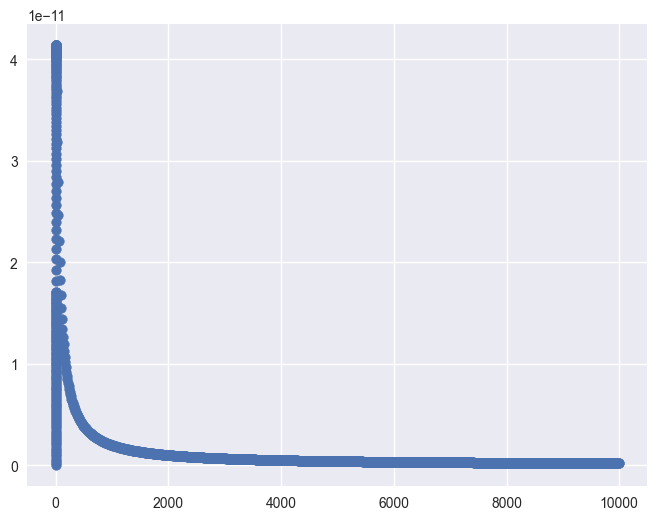

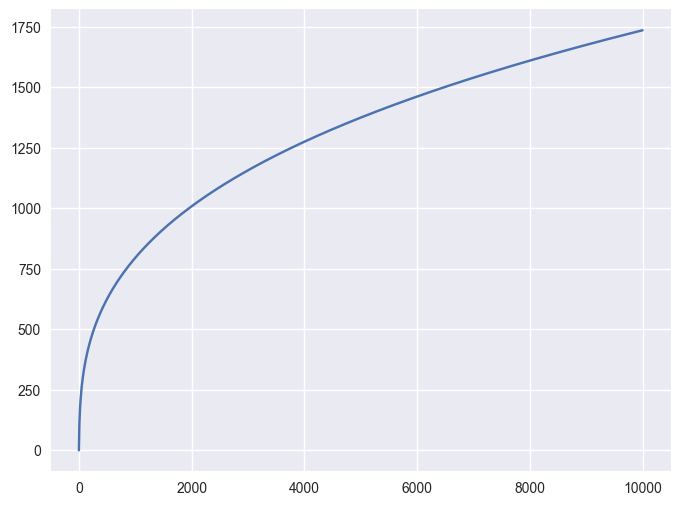

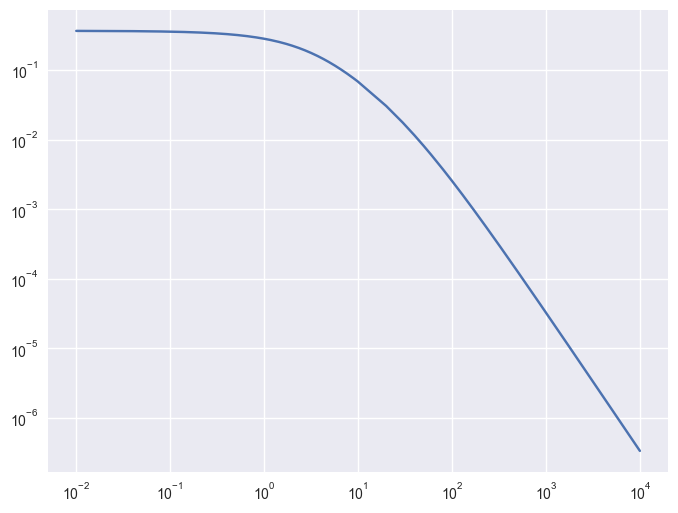

In [554]:
p_in = np.linspace(0,1, 100)
p_in_2 = np.linspace(1, 10,100)
p_in_3 = np.linspace(10, 10000,1000)
p_in_total = np.hstack((p_in, p_in_2, p_in_3))
wr = 4
n_dot = p_in_total*10**-15/(10**18*wr*6.626*10**-34)
cavity_photon = photon_conversion_coupling(gamma, kappa, g, n_dot, K)

def current(photon, gamma):
    currents = []
    efficiency = []
    for i in range(len(photon)):
        G = compu_G(photon[i], 0.00003)
        currents.append(1 / (1 + 1 / (G*photon[i])) * gamma * 10 ** 9 *10 ** -19 * 1.602)
        efficiency.append(1 / (1 + 1 / (G*photon[i])) * gamma * 10 ** 9/(n_dot[i]*10**9))
    return currents, efficiency

currents_2, efficiency = current(cavity_photon, gamma)
plt.plot()
#plt.plot(photon, cavity_photon)
plt.scatter(p_in_total, currents_2)
plt.show()
plt.plot(p_in_total, cavity_photon)
plt.show()
plt.plot(p_in_total, efficiency)
plt.xscale('log')
plt.yscale('log')
plt.show()
#plt.plot(photon,currents_2)

In [79]:
from scipy import constants as const
import numpy as np
import matplotlib.pyplot as plt
def get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi, freq_unit='GHz'):
    f_scale = 10**9
    roots = []
    for pwr in power:
        alpha_in = np.sqrt(pwr/(const.h*fr)) / f_scale
        denom = kappa + gamma_phi
        delta_c_corr = (fr - fdrive + self_Kerr) / denom
        alpha_in_tilde = np.sqrt(kappa_c) * alpha_in / denom
        ksi = self_Kerr * abs(alpha_in_tilde)**2 / denom
        gamma_phi_tilde = gamma_phi * abs(alpha_in_tilde)**2 / denom

        p = [0]*4
        p[0] = -1
        p[1] = 1/4 + delta_c_corr**2
        p[2] = 2*ksi*delta_c_corr + gamma_phi_tilde
        p[3] = gamma_phi_tilde**2 + ksi**2
        poly = np.polynomial.Polynomial(p)
        roots.append(max(poly.roots().real) * abs(alpha_in_tilde)**2)
    return np.array(roots)

def photon_conversion(w, wa, K, ki, kc, n_dot):
    # Convert all inputs to numpy arrays to handle element-wise operations
    wa = np.asarray(wa)
    w = np.asarray(w)
    K = np.asarray(K)
    ki = np.asarray(ki)
    kc = np.asarray(kc)
    #dephase = np.asarray(dephase)
    n_dot = np.asarray(n_dot)

    # Intermediate calculations
    delta = (w - wa) / (ki + kc)
    alpha_norm = np.sqrt(kc * n_dot) / (ki + kc)
    sigma = alpha_norm**2 * K / (ki + kc)

    # Cubic equation coefficients
    a = sigma**2
    b = -2 * sigma * delta
    c = 1/4 + delta**2
    d = -np.ones_like(a)  # Ensure d is array with correct shape

    # Depressed cubic coefficients
    p = (3 * a * c - b**2) / (3 * a**2)
    q = (2 * b**3 - 9 * a * b * c + 27 * a**2 * d) / (27 * a**3)
    D = (q / 2)**2 + (p / 3)**3

    # Initialize result array
    n = np.zeros_like(D)

    # Case 1: D >= 0 (one real root)
    mask_real = D >= 0
    if np.any(mask_real):
        q_masked = q[mask_real]
        D_masked = D[mask_real]
        sqrt_D = np.sqrt(D_masked)
        term1 = np.cbrt(-q_masked/2 + sqrt_D)
        term2 = np.cbrt(-q_masked/2 - sqrt_D)
        n[mask_real] = -b[mask_real]/(3*a[mask_real]) + term1 + term2

    # Case 2: D < 0 (three real roots, using k=1)
    mask_complex = D < 0
    if np.any(mask_complex):
        p_masked = p[mask_complex]
        q_masked = q[mask_complex]

        # Calculate angle components
        with np.errstate(invalid='ignore'):  # Suppress temporary invalid warnings
            arg_arccos = (-q_masked / 2) * np.sqrt(-27 / p_masked**3)

        theta = np.arccos(np.clip(arg_arccos, -1, 1))  # Ensure valid arccos input
        k = 1
        angle = theta / 3 - 2 * np.pi * (k - 1) / 3
        n[mask_complex] = np.max(2 * np.sqrt(-p_masked / 3) * np.cos(angle))
        
    # Calculate final photon number
    resonator_photon = n * alpha_norm**2

    # Return scalar if input was scalar
    if np.isscalar(w) and np.isscalar(resonator_photon):
        return float(resonator_photon)
    
    return resonator_photon # old


def photocurrent_nonlinear(power, fdrive, fr, kappa, kappa_c, self_Kerr, cross_Kerr, gamma_phi_kerr, Gamma_L, Gamma_R, g0, tc, gamma_relax):
    f_scale = 10**9
    Gamma_out = Gamma_R
    delta_c = fr - fdrive
    delta_per_fr = -np.sqrt(1 - (2*tc / fr)**2)
    Gamma_0e = (Gamma_L + Gamma_R) + (Gamma_L - Gamma_R)*delta_per_fr
    Gamma_g0 = (Gamma_L + Gamma_R)*0.5 - (Gamma_L - Gamma_R)*delta_per_fr*0.5
    Gamma_1 = gamma_relax + (2*Gamma_0e*Gamma_g0 - gamma_relax*Gamma_0e) / (Gamma_0e + 2*Gamma_g0)
    Gamma_2 = (gamma_relax + Gamma_0e) / 2
    nc = get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi_kerr, freq_unit='GHz')
    n_dot = power/(const.hbar*fr*10**18)
    nc = photon_conversion(fr, fr, self_Kerr, kappa-kappa_c, kappa_c, n_dot)
    g_eff = g0 * 2*tc/fr
    g_eff = g0 * 2*tc/fr*(np.sqrt((fr+nc*self_Kerr)/fr))
    print(g_eff)
    print(fr+self_Kerr*nc*2-fr)
    print('scale,', g_eff/(fr+self_Kerr*nc*2-fr))
    G = 4*g_eff**2 * Gamma_2 / (Gamma_1 * (delta_c + cross_Kerr *nc**2)**2 + Gamma_2**2)
    m_z = -1/(1 + G*nc)

    return const.e * Gamma_out/2*np.pi * (1+m_z) / (Gamma_0e+2*Gamma_g0) * (Gamma_0e * (1-delta_per_fr) - Gamma_g0 * (1+delta_per_fr)) * f_scale

In [551]:
power = np.linspace(0, 200e-15, 100)
fdrive = 3.65
fr = fdrive
kappa = 0.02766
kappa_c = 0.0226
self_Kerr = -1.3e-3
cross_Kerr = 0.0e-3
gamma_phi_kerr = 0.000e-3
Gamma_L = 3.5
Gamma_R = 3.5
gamma_relax = 0.03
g0 = 0.08
tc = 1
photocurrent = photocurrent_nonlinear(power, fdrive, fr, kappa, kappa_c, self_Kerr, cross_Kerr, gamma_phi_kerr, Gamma_L, Gamma_R, g0, tc, gamma_relax)
#plt.plot(power,get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, 0.001, freq_unit='GHz' ))
plt.plot(power*1e15, photocurrent*1e12)
print(photocurrent[-1])

TypeError: photocurrent_nonlinear() missing 1 required positional argument: 'gamma_relax'

In [593]:
from scipy import constants as const
import numpy as np
import matplotlib.pyplot as plt
def get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi, freq_unit='GHz'):
    f_scale = 10**9
    roots = []
    for pwr in power:
        alpha_in = np.sqrt(pwr/(const.h*fr)) / f_scale
        denom = kappa + gamma_phi
        delta_c_corr = (fr - fdrive + self_Kerr) / denom
        alpha_in_tilde = np.sqrt(kappa_c) * alpha_in / denom
        ksi = self_Kerr * abs(alpha_in_tilde)**2 / denom
        gamma_phi_tilde = gamma_phi * abs(alpha_in_tilde)**2 / denom

        p = [0]*4
        p[0] = -1
        p[1] = 1/4 + delta_c_corr**2
        p[2] = 2*ksi*delta_c_corr + gamma_phi_tilde
        p[3] = gamma_phi_tilde**2 + ksi**2
        poly = np.polynomial.Polynomial(p)
        roots.append(max(poly.roots().real) * abs(alpha_in_tilde)**2)
    return np.array(roots)

def photocurrent_nonlinear(power, fdrive, fr, kappa, kappa_c, self_Kerr, cross_Kerr, gamma_phi_kerr, Gamma_L, Gamma_R, g0, tc, gamma_relax):
    f_scale = 10**9
    Gamma_out = Gamma_R
    delta_c = fr - fdrive
    delta_per_fr = -np.sqrt(1 - (2*tc / fr)**2)
    Gamma_0e = (Gamma_L + Gamma_R) + (Gamma_L - Gamma_R)*delta_per_fr
    Gamma_g0 = (Gamma_L + Gamma_R)*0.5 - (Gamma_L - Gamma_R)*delta_per_fr*0.5
    Gamma_1 = gamma_relax + (2*Gamma_0e*Gamma_g0 - gamma_relax*Gamma_0e) / (Gamma_0e + 2*Gamma_g0)
    Gamma_2 = (gamma_relax + Gamma_0e) / 2
    nc = get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi_kerr, freq_unit='GHz')
    g_eff = g0 * 2*tc/fr
    #g_eff = g0 * 2*tc/fr*(np.sqrt((fr+nc*2*self_Kerr)/fr))
    G = 4*g_eff**2 * Gamma_2 / (Gamma_1 * ((delta_c + cross_Kerr *nc**2)**2 + Gamma_2**2))
    m_z = -1/(1 + G*nc)

    return const.e * Gamma_out/2*np.pi * (1+m_z) / (Gamma_0e+2*Gamma_g0) * (Gamma_0e * (1-delta_per_fr) - Gamma_g0 * (1+delta_per_fr)) * f_scale

3.300421823646105e-11


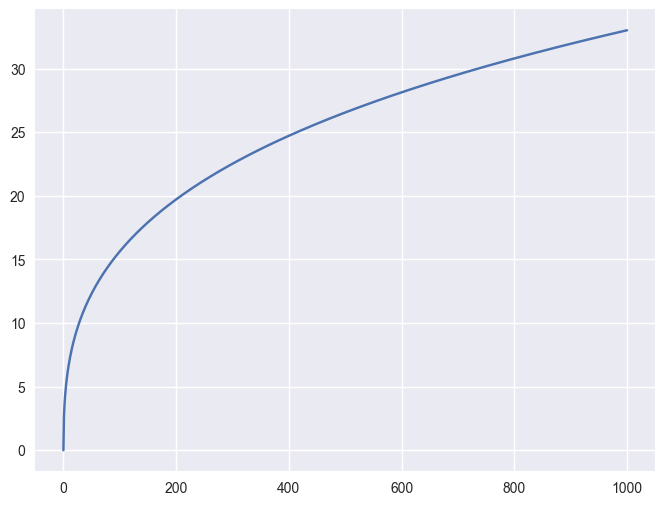

In [596]:
power = np.linspace(0, 1000e-15, 1000)
fdrive = 3.65
fr = fdrive
kappa = 0.02766
kappa_c = 0.0226
self_Kerr = -0.03
cross_Kerr = 0.00e-3
gamma_phi_kerr = -0.00e-3
Gamma_L = 1.5
Gamma_R = 1.5
gamma_relax = 0.03
dot_dephasing = 0.003
g0 = 0.1
tc = 1
photocurrent = photocurrent_nonlinear(power, fdrive, fr, kappa, kappa_c, self_Kerr, cross_Kerr, gamma_phi_kerr, Gamma_L, Gamma_R, g0, tc, gamma_relax)
#plt.plot(power,get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, 0.001, freq_unit='GHz' ))
plt.plot(power*1e15, photocurrent*1e12)
print(photocurrent[-1])

In [178]:
from scipy import constants as const
import numpy as np
import matplotlib.pyplot as plt
def get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi, freq_unit='GHz'):
    f_scale = 10**9
    roots = []
    for pwr in power:
        alpha_in = np.sqrt(pwr/(const.h*fr)) / f_scale
        denom = kappa + gamma_phi
        delta_c_corr = (-fr + fdrive) / denom
        alpha_in_tilde = np.sqrt(kappa_c) * alpha_in / denom
        ksi = self_Kerr * abs(alpha_in_tilde)**2 / denom
        gamma_phi_tilde = gamma_phi * abs(alpha_in_tilde)**2 / denom

        p = [0]*4
        p[0] = -1
        p[1] = 1/4 + delta_c_corr**2
        p[2] = -2*ksi*delta_c_corr 
        p[3] = ksi**2
        poly = np.polynomial.Polynomial(p)
        roots.append(max(poly.roots().real) * abs(alpha_in_tilde)**2)
    return np.array(roots)

def photocurrent_nonlinear(power, fdrive, fr, kappa, kappa_c, self_Kerr, cross_Kerr, gamma_phi_kerr, Gamma_L, Gamma_R, g0, tc, gamma_relax):
    f_scale = 10**9
    Gamma_out = Gamma_R
    delta_c = fr - fdrive
    delta_per_fr = -np.sqrt(1 - (2*tc / fr)**2)
    Gamma_0e = (Gamma_L + Gamma_R) + (Gamma_L - Gamma_R)*delta_per_fr
    Gamma_g0 = (Gamma_L + Gamma_R)*0.5 - (Gamma_L - Gamma_R)*delta_per_fr*0.5
    Gamma_1 = gamma_relax + (2*Gamma_0e*Gamma_g0 - gamma_relax*Gamma_0e) / (Gamma_0e + 2*Gamma_g0)
    Gamma_2 = (gamma_relax + Gamma_0e) / 2
    nc = get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi_kerr, freq_unit='GHz')
    g_eff = g0 * 2*tc/fr
    #g_eff = g0 * 2*tc/fr*(np.sqrt((fr+nc*2*self_Kerr)/fr))
    G = 4*g_eff**2*Gamma_2/ (Gamma_1 * ((delta_c)**2 + (Gamma_2)**2))
    m_z = -1/(1 + G*nc)
    return const.e * Gamma_out/2*np.pi * (1+m_z) / (Gamma_0e+2*Gamma_g0) * (Gamma_0e * (1-delta_per_fr) - Gamma_g0 * (1+delta_per_fr)) * f_scale

3.1752094612566023e-10


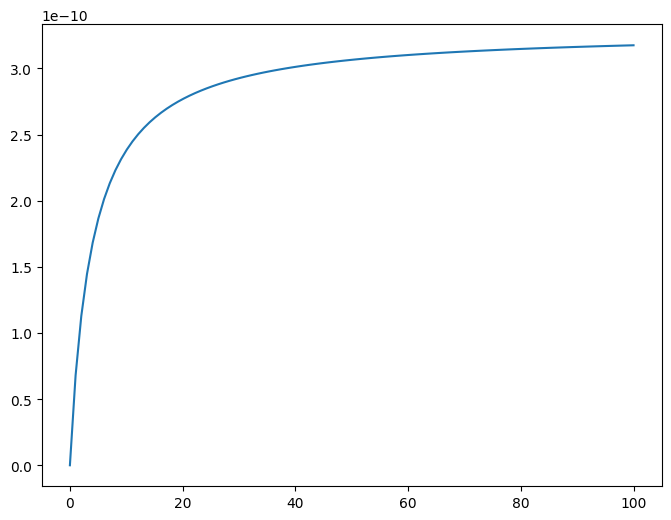

In [179]:
power = np.linspace(0.0000, 100e-15, 100)
fdrive = 3.65
fr = fdrive
kappa = 0.02766
kappa_c = 0.0226
self_Kerr = -0.001e-3
cross_Kerr =0.00e-3
gamma_phi_kerr = -0.00e-3
Gamma_L = 1.5
Gamma_R = 1.5
gamma_relax = 0.03
dot_dephasing = 0.003
g0 = 0.1
tc = 1
photocurrent = photocurrent_nonlinear(power, fdrive, fr, kappa, kappa_c, self_Kerr, cross_Kerr, gamma_phi_kerr, Gamma_L, Gamma_R, g0, tc, gamma_relax)
#plt.plot(power,get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, 0.001, freq_unit='GHz' ))
plt.plot(power*1e15, photocurrent)
print(photocurrent[-1])

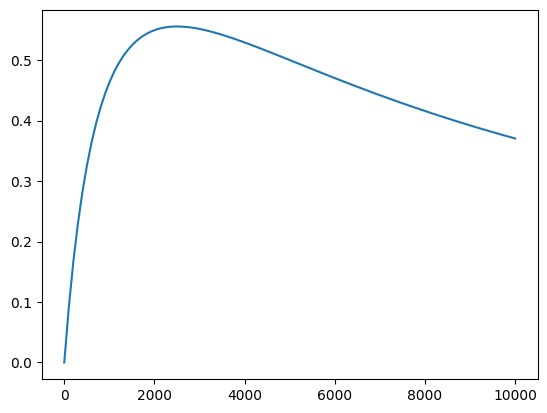

In [225]:
def fu(G, T2, photon):
    return G*photon/(1+T2**2*(photon)**2+G*photon)
photon_num = np.linspace(0,10000,100)
plt.plot(photon_num, fu(0.001, 0.0004, photon_num))
plt.show()

In [1037]:
from scipy import constants as const
import numpy as np
import matplotlib.pyplot as plt

def get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi, freq_unit='GHz'):
    f_scale = 10**9
    roots = []
    for pwr in power:
        alpha_in = np.sqrt(pwr/(const.h*fr))/f_scale
        denom = kappa + gamma_phi
        delta_c_corr = (-fr + fdrive) / denom
        alpha_in_tilde = np.sqrt(kappa_c) * alpha_in / denom
        ksi = self_Kerr * abs(alpha_in_tilde)**2 / denom
        gamma_phi_tilde = gamma_phi * abs(alpha_in_tilde)**2 / denom
        p = [0]*4
        p[0] = -1
        p[1] = 1/4 + delta_c_corr**2
        p[2] = -2*ksi*delta_c_corr + gamma_phi_tilde
        p[3] = ksi**2 + gamma_phi_tilde**2
        poly = np.polynomial.Polynomial(p)
        roots.append(max(poly.roots().real) * abs(alpha_in_tilde)**2)
    return np.array(roots)

def photocurrent_nonlinear(power, fdrive, fr,fqubit, kappa, kappa_c, self_Kerr, cross_Kerr, gamma_phi_kerr, Gamma_L, Gamma_R, g0, tc, gamma_relax, dot_dephasing):
    f_scale = 10**9
    Gamma_out = Gamma_R
    delta_c = fr - fdrive
    delta_per_fr = -np.sqrt(1 - (2*tc / fr))
    epsilon = (fqubit**2-4*tc**2)**0.5
    cos_theta_2 = (1-epsilon/fqubit)/2 #cos(theta/2)^2
    sin_theta_2 = 1-cos_theta_2
    Gamma_0e = Gamma_L*cos_theta_2 + Gamma_R*sin_theta_2
    Gamma_g0 = Gamma_L*sin_theta_2 + Gamma_R*cos_theta_2
    Gamma_1 = gamma_relax + (2*Gamma_0e*Gamma_g0 - gamma_relax*Gamma_0e) / (Gamma_0e + 2*Gamma_g0)
    Gamma_2 = (gamma_relax + Gamma_0e) / 2 + dot_dephasing
    nc = get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi_kerr, freq_unit='GHz')
    #nc = photon_conversion(fdrive,fr,kappa,kappa-kc,kc,gamma_phi_kerr, gamma_phi_kerr, power/(const.h*fr*10**18))
    cos_theta = -epsilon/(fqubit)
    g_eff = g0*(1-cos_theta**2)
    #g_eff = g0 * 2*tc/fr*(np.sqrt((fr+nc*2*self_Kerr)/fr))
    #G = 4*g_eff**2*Gamma_2/ (Gamma_1 * ((delta_c)**2 + (Gamma_2)**2))
    G = 4*g_eff**2*(Gamma_2+nc**2*dot_dephasing)/ (Gamma_1 * ((delta_c)**2 + (Gamma_2+nc**2*dot_dephasing)**2))
    m_z = -1/(1 + G*nc)
    return const.e * Gamma_R * (1+m_z)/(2*np.pi) / (Gamma_0e+2*Gamma_g0) * (Gamma_0e * cos_theta_2 - Gamma_g0 * sin_theta_2) * f_scale*-1

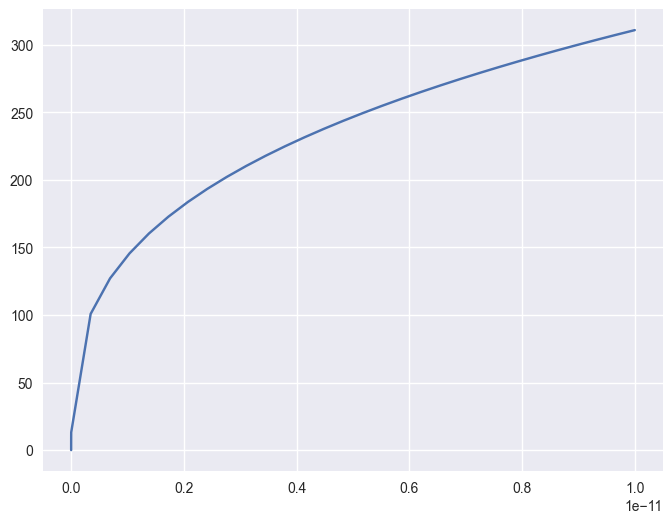

7.422673765908747e-13


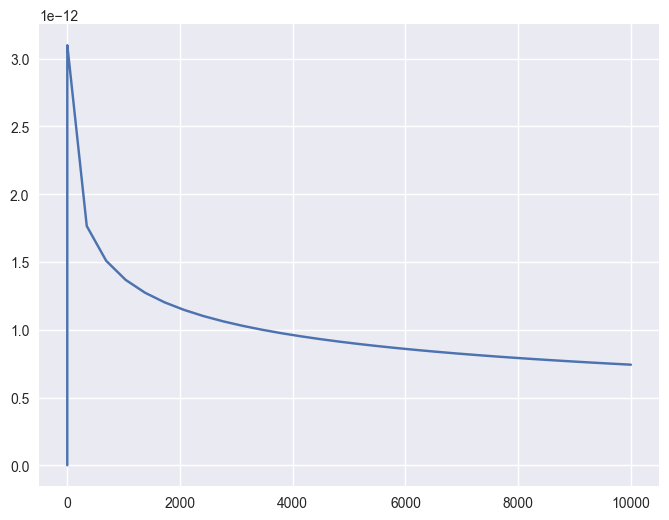

In [1046]:
power = np.linspace(0, 0.01e-15, 30)
power_higher = np.linspace(0.01e-15, 1e-15, 30)
power_higherer = np.linspace(1e-15,10000e-15, 30)
power = np.hstack((power, power_higher, power_higherer))
fdrive = 3.65
fr = fdrive
kappa = 0.01566
kappa_c = 0.0136
self_Kerr = -0.00135
cross_Kerr = 0
gamma_phi_kerr = 0.0002
Gamma_L = 1
Gamma_R = 1
gamma_relax = 0.03
dot_dephasing = 0.0015
g0 = 0.2
tc = 1.35
cavity_photon_numebr = get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi_kerr, freq_unit='GHz')
plt.plot(power, cavity_photon_numebr)
plt.show()
photocurrent = photocurrent_nonlinear(power, fdrive, fr,fr, kappa, kappa_c, self_Kerr, cross_Kerr, gamma_phi_kerr, Gamma_L, Gamma_R, g0, tc, gamma_relax, dot_dephasing)
#plt.plot(power,get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, 0.001, freq_unit='GHz' ))
plt.plot(power*1e15, photocurrent)
print(photocurrent[-1])

/var/folders/0x/61cppml13m3_585zg8q3279w0000gn/T/ipykernel_13677/2816128181.py:8: RuntimeWarning: invalid value encountered in scalar divide
  100*photocurrent[i] / (1.602e-19 * power[i] / (const.h * fr * 1e9))


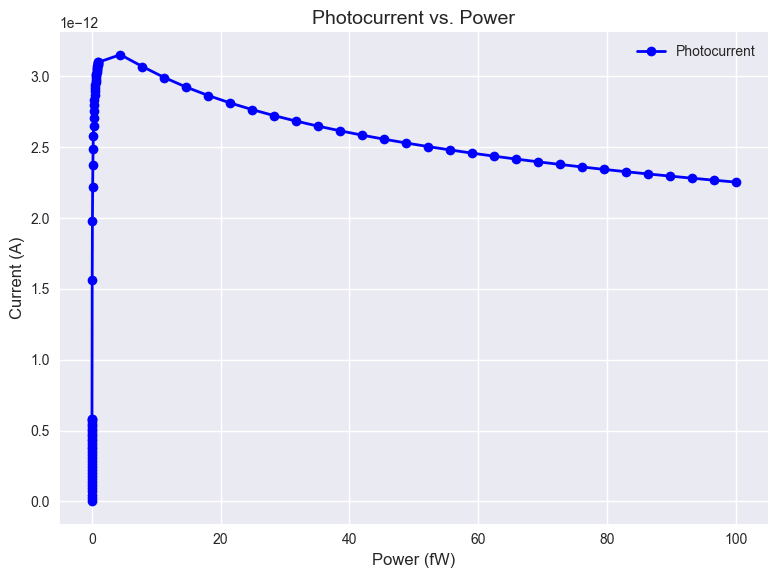

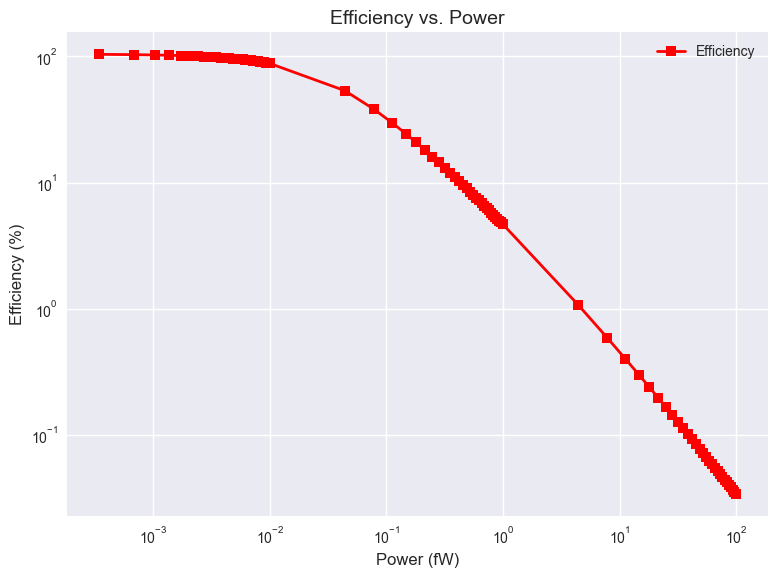

In [1045]:
# Compute the photocurrent and efficiency
photocurrent = photocurrent_nonlinear(power, fdrive, fr,fr, kappa, kappa_c, 
                                      self_Kerr, cross_Kerr, gamma_phi_kerr, 
                                      Gamma_L, Gamma_R, g0, tc, gamma_relax,dot_dephasing)

# Calculate efficiency (ensure const.hbar and fr are correctly defined)
efficiency = np.array([
    100*photocurrent[i] / (1.602e-19 * power[i] / (const.h * fr * 1e9))
    for i in range(len(photocurrent))
])

# Set a nice style and configure plot parameters
plt.rcParams.update({'font.size': 14, 'figure.figsize': (8, 6)})

# Plot 1: Photocurrent vs. Power
fig, ax = plt.subplots()
ax.plot(power * 1e15, photocurrent, marker='o', linestyle='-', linewidth=2, color='blue', label='Photocurrent')
ax.set_xlabel('Power (fW)')
ax.set_ylabel('Current (A)')
ax.set_title('Photocurrent vs. Power')
ax.legend()
plt.tight_layout()
plt.show()

# Plot 2: Efficiency vs. Power (Log-Log Scale)
fig, ax = plt.subplots()
ax.plot(power * 1e15, efficiency, marker='s', linestyle='-', linewidth=2, color='red', label='Efficiency')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Power (fW)')
ax.set_ylabel('Efficiency (%)')
ax.set_title('Efficiency vs. Power')
ax.legend()
plt.tight_layout()
plt.show()


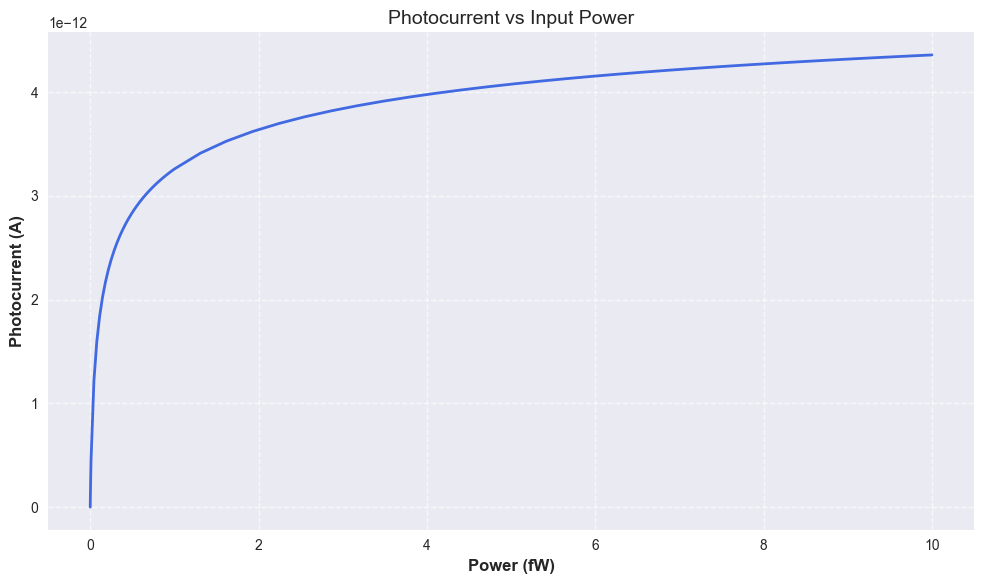

/var/folders/0x/61cppml13m3_585zg8q3279w0000gn/T/ipykernel_13677/2077963887.py:20: RuntimeWarning: invalid value encountered in scalar divide
  efficiency = [100*photocurrent[i] / (1.602e-19 * power[i] / (const.h * fr * 1e9))  # Added 100* for percentage


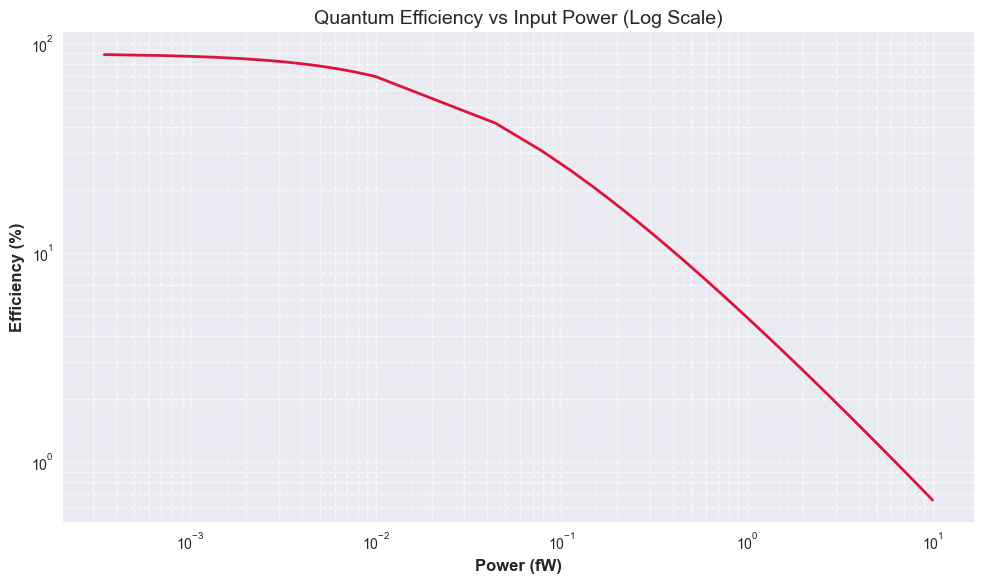

In [1008]:
# Calculate photocurrent
photocurrent = photocurrent_nonlinear(power, fdrive, fr,fr, kappa, kappa_c, self_Kerr, cross_Kerr, gamma_phi_kerr, Gamma_L, Gamma_R, g0, tc, gamma_relax, dot_dephasing)

# Styling adjustments
plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 14, 'axes.labelsize': 12})

# Plot 1: Photocurrent vs Power
plt.figure(figsize=(10, 6))
plt.plot(power * 1e15, photocurrent, color='royalblue', linewidth=2)
plt.xlabel('Power (fW)', fontweight='bold')  # Corrected unit to femtowatts (fW)
plt.ylabel('Photocurrent (A)', fontweight='bold')
plt.title('Photocurrent vs Input Power')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot 2: Efficiency (log-log scale)
plt.figure(figsize=(10, 6))
efficiency = [100*photocurrent[i] / (1.602e-19 * power[i] / (const.h * fr * 1e9))  # Added 100* for percentage
              for i in range(len(photocurrent))]

plt.plot(power * 1e15, efficiency, color='crimson', linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Power (fW)', fontweight='bold')
plt.ylabel('Efficiency (%)', fontweight='bold')  # Corrected label
plt.title('Quantum Efficiency vs Input Power (Log Scale)')
plt.grid(True, linestyle='--', alpha=0.7, which='both')
plt.tight_layout()
plt.show()

Interdot tunneling rate modeling

/var/folders/0x/61cppml13m3_585zg8q3279w0000gn/T/ipykernel_13677/258378960.py:34: RuntimeWarning: invalid value encountered in scalar divide
  Gamma_1 = gamma_relax + (2*Gamma_0e*Gamma_g0 - gamma_relax*Gamma_0e) / (Gamma_0e + 2*Gamma_g0)


Text(0, 0.5, 'Efficiency (%)')

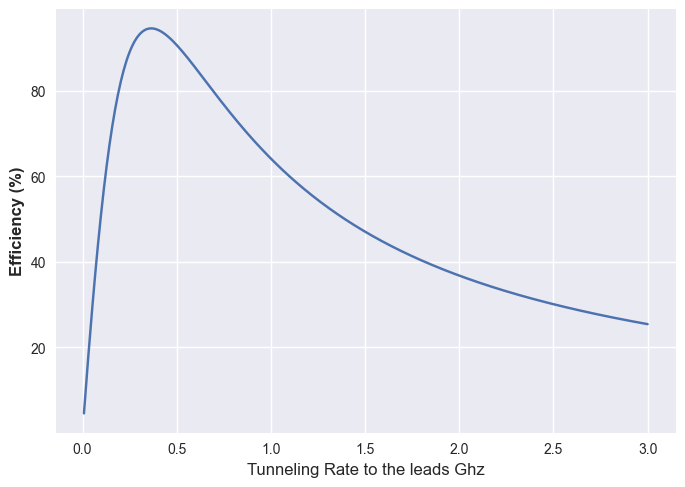

In [1016]:
tunneling_rate = np.linspace(0,3, 400)
power = np.linspace(0.014e-15, 1e-15, 100)
n_dot = power / (const.h * fr * 1e9)
max_efficiency = []
for j in range(len(tunneling_rate)):
    photocurrent = photocurrent_nonlinear(power, fdrive, fr,fr, kappa, kappa_c, 
                                      self_Kerr, cross_Kerr, gamma_phi_kerr, 
                                      tunneling_rate[j], tunneling_rate[j], g0, tc, gamma_relax, dot_dephasing)
# Calculate efficiency (ensure const.hbar and fr are correctly defined)
    efficiency = [100 * photocurrent[i] / (1.602e-19*power[i] / (const.h * fr * 1e9))  # Added 100* for percentage
                  for i in range(len(photocurrent))]
    max_efficiency.append(np.max(efficiency))
plt.plot(tunneling_rate, max_efficiency)
plt.xlabel('Tunneling Rate to the leads Ghz')
plt.ylabel('Efficiency (%)', fontweight='bold')

In [816]:
fr

3.65

Characteristic of DQD

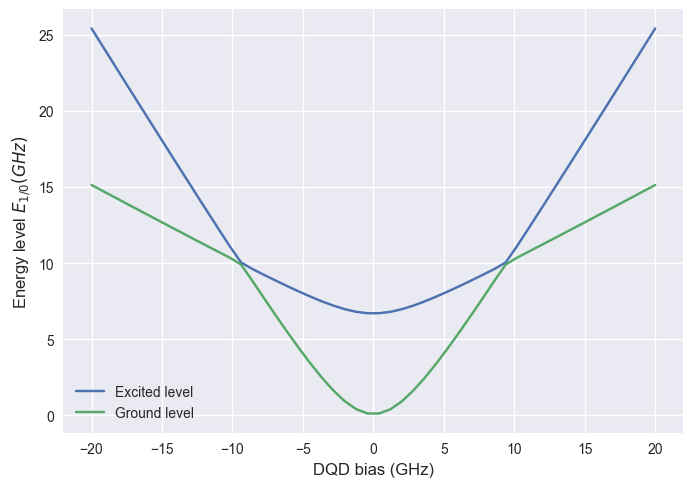

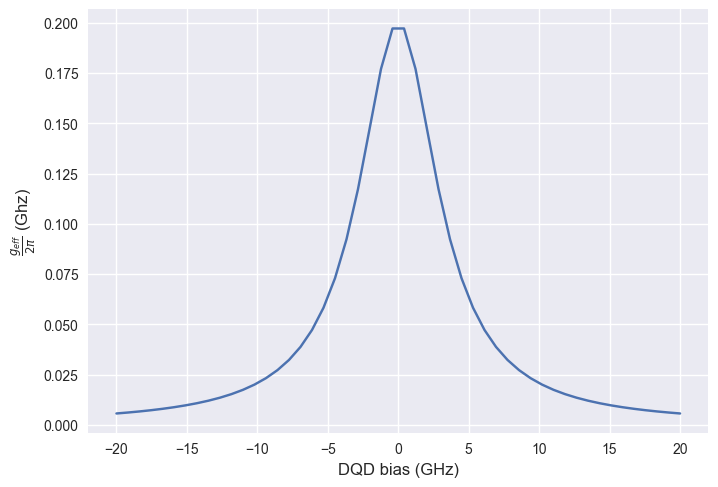

In [925]:
fdrive_dispersive = 10
def energydiagram(epsilon, fdrive, g0, tc):
    #epsilon = (frequency**2-4*tc)**0.5
    frequency = np.sqrt(epsilon**2+4*tc**2)
    cos_theta_2 = (1-epsilon/frequency)/2 #cos(theta/2)^2
    sin_theta_2 = 1-cos_theta_2
    g = g0*np.sqrt(1-(epsilon/frequency)**2)
    E_up = (frequency)+np.sqrt(4*g**2+(fdrive-frequency)**2)/2
    E_down = (frequency)-np.sqrt(4*g**2+(fdrive-frequency)**2)/2
    return E_up, E_down

def g(epsilon, g0, tc):
    frequency = np.sqrt(epsilon**2+4*tc**2)
    cos_theta = -epsilon/(frequency)
    g = g0*(1-cos_theta**2)
    return g

DQD_bias = np.linspace(-20,20, 50)
tc =1.35
g0 = 0.2
fdrive_dispersive = 10
plt.plot(DQD_bias, energydiagram(DQD_bias,fdrive_dispersive,g0, tc)[0], label = 'Excited level')
plt.xlabel('DQD bias (GHz)')
plt.ylabel(r'Energy level $E_{1/0} (GHz)$')
plt.plot(DQD_bias, energydiagram(DQD_bias,fdrive_dispersive,g0, tc)[1], label = 'Ground level')
plt.legend()
plt.show()
plt.plot(DQD_bias,g(DQD_bias, g0, tc))
plt.xlabel('DQD bias (GHz)')
plt.ylabel(r'$\frac{g_{eff}}{2\pi}$ (Ghz)')
plt.show()

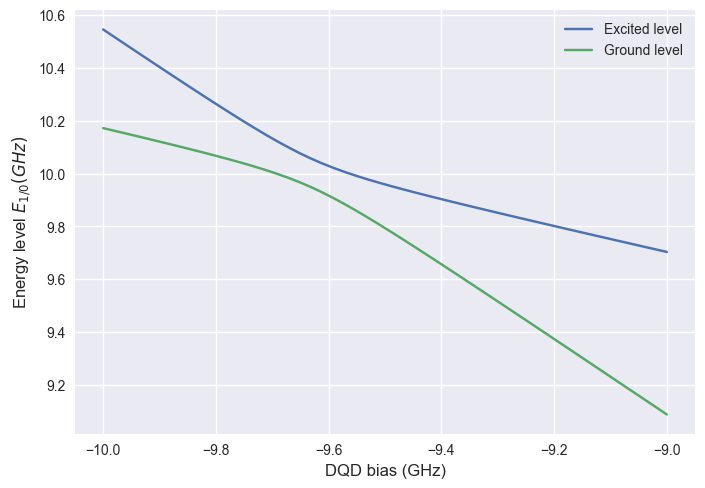

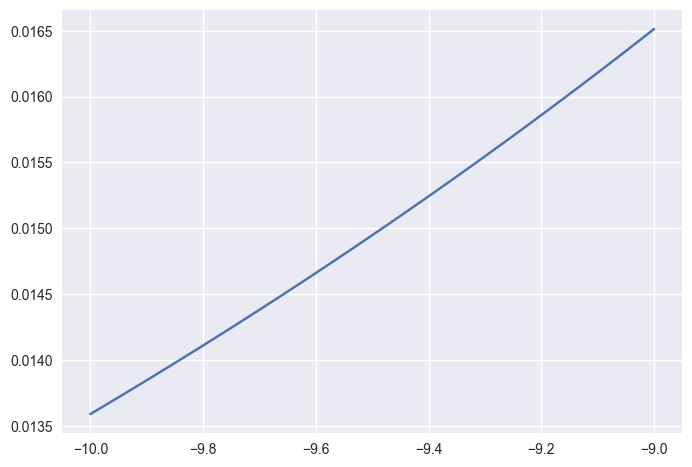

In [1017]:
def energydiagram(epsilon, fdrive, g0, tc):
    #epsilon = (frequency**2-4*tc)**0.5
    frequency = np.sqrt(epsilon**2+4*tc**2)
    cos_theta_2 = (1-epsilon/frequency)/2 #cos(theta/2)^2
    sin_theta_2 = 1-cos_theta_2
    g = g0*np.sqrt(1-(cos_theta_2-sin_theta_2)**2)
    E_up = (frequency)+np.sqrt(4*g**2+(fdrive-frequency)**2)/2
    E_down = (frequency)-np.sqrt(4*g**2+(fdrive-frequency)**2)/2
    return E_up, E_down
def g(epsilon, g0, tc):
    frequency = np.sqrt(epsilon**2+4*tc**2)
    cos_theta = -epsilon/(frequency)
    g = g0*(1-cos_theta**2)
    return g
DQD_bias = np.linspace(-10,-9, 50)
plt.plot(DQD_bias, energydiagram(DQD_bias,fdrive_dispersive,g0, tc)[0], label = 'Excited level')
plt.xlabel('DQD bias (GHz)')
plt.ylabel(r'Energy level $E_{1/0} (GHz)$')
plt.plot(DQD_bias, energydiagram(DQD_bias,fdrive_dispersive,g0, tc)[1], label = 'Ground level')
plt.legend()
plt.show()
plt.plot(DQD_bias,g(DQD_bias, g0, tc))
plt.show()

[0.01006618 0.0101418  0.01021825 0.01029555 0.01037371 0.01045274
 0.01053266 0.01061347 0.01069519 0.01077783 0.01086141 0.01094594
 0.01103143 0.0111179  0.01120536 0.01129383 0.01138333 0.01147386
 0.01156544 0.0116581  0.01175184 0.01184668 0.01194264 0.01203974
 0.01213799 0.01223742 0.01233803 0.01243985 0.01254289 0.01264718
 0.01275274 0.01285958 0.01296773 0.0130772  0.01318802 0.01330021
 0.01341378 0.01352877 0.01364519 0.01376307 0.01388244 0.0140033
 0.0141257  0.01424965 0.01437518 0.01450232 0.01463109 0.01476151
 0.01489363 0.01502746 0.01516303 0.01530037 0.01543951 0.01558049
 0.01572333 0.01586806 0.01601472 0.01616334 0.01631395 0.01646659
 0.01662129 0.01677808 0.01693701 0.01709811 0.01726142 0.01742697
 0.01759481 0.01776497 0.0179375  0.01811244 0.01828982 0.01846971
 0.01865213 0.01883713 0.01902476 0.01921508 0.01940811 0.01960392
 0.01980256 0.02000407 0.02020851 0.02041593 0.02062639 0.02083994
 0.02105664 0.02127655 0.02149972 0.02172623 0.02195612 0.02218

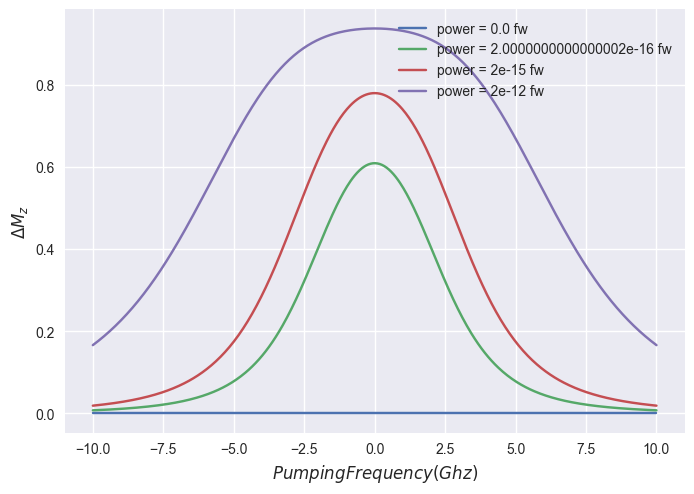

In [1023]:
def get_photonnumber_int(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi, freq_unit='GHz'):
    f_scale = 10**9
    roots = []

    alpha_in = np.sqrt(power/(const.h*fr)) / f_scale
    denom = kappa + gamma_phi
    delta_c_corr = (-fr + fdrive) / denom
    alpha_in_tilde = np.sqrt(kappa_c) * alpha_in / denom
    ksi = self_Kerr * abs(alpha_in_tilde)**2 / denom
    gamma_phi_tilde = gamma_phi * abs(alpha_in_tilde)**2 / denom

    p = [0]*4
    p[0] = -1
    p[1] = 1/4 + delta_c_corr**2
    p[2] = -2*ksi*delta_c_corr 
    p[3] = ksi**2
    poly = np.polynomial.Polynomial(p)
    return max(poly.roots().real) * abs(alpha_in_tilde)**2

def mz(power, fdrive, fr,dqd_bias, kappa, kappa_c, self_Kerr, gamma_phi_kerr, Gamma_L, Gamma_R, g0, tc, gamma_relax):
    delta_c = fr - fdrive
    fqubit = np.sqrt(dqd_bias**2+4*tc**2)
    epsilon = (fqubit**2-4*tc)**0.5
    cos_theta_2 = (1-epsilon/fqubit)/2 #cos(theta/2)^2
    sin_theta_2 = 1-cos_theta_2
    Gamma_0e = Gamma_L*cos_theta_2 + Gamma_R*sin_theta_2
    Gamma_g0 = Gamma_L*sin_theta_2 + Gamma_R*cos_theta_2
    Gamma_1 = gamma_relax + (2*Gamma_0e*Gamma_g0 - gamma_relax*Gamma_0e) / (Gamma_0e + 2*Gamma_g0)
    Gamma_2 = (gamma_relax + Gamma_0e) / 2
    nc = get_photonnumber_int(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi_kerr, freq_unit='GHz')
    cos_theta = -epsilon/(fqubit)
    g_eff = g0*(1-cos_theta**2)
    print(g_eff)
    #g_eff = g0 * 2*tc/fr*(np.sqrt((fr+nc*2*self_Kerr)/fr))
    m0 = -(Gamma_0e)*Gamma_g0/((gamma_relax+Gamma_0e)*Gamma_g0+Gamma_0e*(gamma_relax)/2)
    G = 4*g_eff**2*Gamma_2/ (Gamma_1 * ((delta_c)**2 + (Gamma_2)**2))
    m_z = m0/(1 + G*nc)
    return m_z, m0
power = np.linspace(0, 0.2, 2)*10**-15
power1 = np.linspace(2, 2000, 2)*10**-15
power = np.hstack((power, power1))
DQD_bias = np.linspace(-10,10, 500)
mz_list = []
m0_list = []
for i in range(len(power)):
    mz_array, m0_array = mz(power[i], fdrive, fr,DQD_bias, kappa, kappa_c, self_Kerr, gamma_phi_kerr, Gamma_L, Gamma_R, g0, tc, gamma_relax)
    mz_list.append(mz_array)
    m0_list.append(m0_array)
#plt.plot(DQD_bias, mz_list[1])
for i in range(len(power)):
    #plt.plot(DQD_bias, mz_list[i])
    plt.plot(DQD_bias, mz_list[i]-m0_list[i], label = f'power = {power[i]} fw')
plt.ylabel(r'$\Delta M_{z}$')
plt.xlabel(r'$Pumping Frequency (Ghz)$')
plt.legend()
plt.show()

In [ ]:
$
